###e25###

1 256 512 1024

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8491 - loss: 0.5379 - val_accuracy: 0.9523 - val_loss: 0.1632
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9572 - loss: 0.1475 - val_accuracy: 0.9676 - val_loss: 0.1078
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9742 - loss: 0.0934 - val_accuracy: 0.9693 - val_loss: 0.0975
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9802 - loss: 0.0698 - val_accuracy: 0.9733 - val_loss: 0.0829
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9838 - loss: 0.0560 - val_accuracy: 0.9779 - val_loss: 0.0709
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9889 - loss: 0.0405 - val_accuracy: 0.9779 - val_loss: 0.0717
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9909 - loss: 0.0322 - val_accuracy: 0.9787 - val_loss: 0.0653
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9943 - loss: 0.0233 - val_accurac

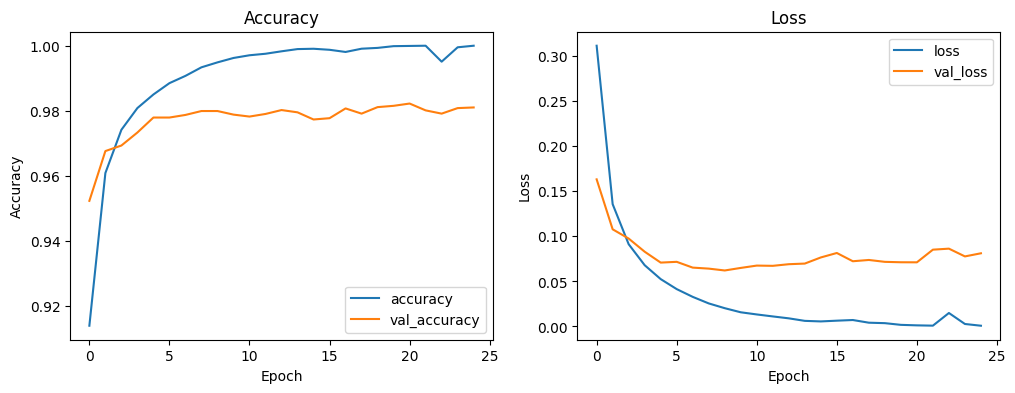

In [1]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8691 - loss: 0.4692 - val_accuracy: 0.9591 - val_loss: 0.1406
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9653 - loss: 0.1203 - val_accuracy: 0.9725 - val_loss: 0.0890
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9797 - loss: 0.0733 - val_accuracy: 0.9747 - val_loss: 0.0783
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9850 - loss: 0.0510 - val_accuracy: 0.9778 - val_loss: 0.0715
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9909 - loss: 0.0335 - val_accuracy: 0.9778 - val_loss: 0.0721
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9921 - loss: 0.0286 - val_accuracy: 0.9798 - val_loss: 0.0657
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9952 - loss: 0.0186 - val_accuracy: 0.9814 - val_loss: 0.0605
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9949 - loss: 0.0171 - val_acc

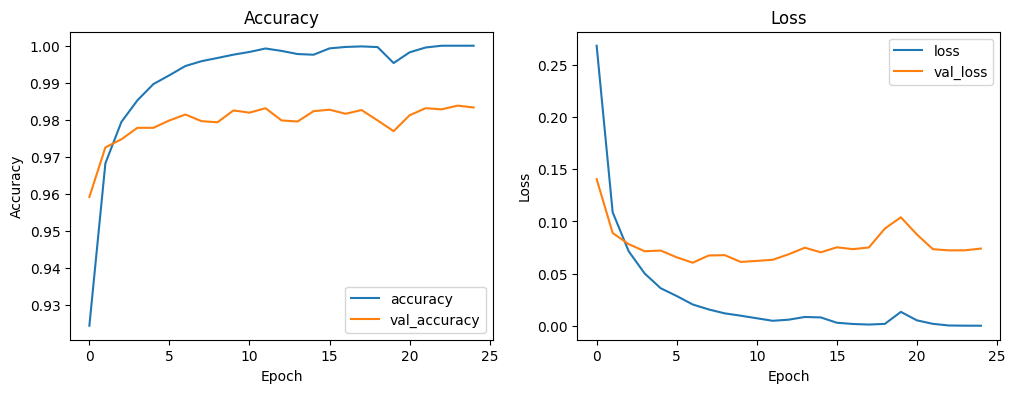

In [2]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8775 - loss: 0.4175 - val_accuracy: 0.9629 - val_loss: 0.1187
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9709 - loss: 0.0991 - val_accuracy: 0.9761 - val_loss: 0.0807
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9818 - loss: 0.0599 - val_accuracy: 0.9784 - val_loss: 0.0701
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9888 - loss: 0.0387 - val_accuracy: 0.9791 - val_loss: 0.0681
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9928 - loss: 0.0258 - val_accuracy: 0.9796 - val_loss: 0.0654
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9947 - loss: 0.0197 - val_accuracy: 0.9809 - val_loss: 0.0610
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9963 - loss: 0.0137 - val_accuracy: 0.9809 - val_loss: 0.0622
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9975 - loss: 0.0103 - v

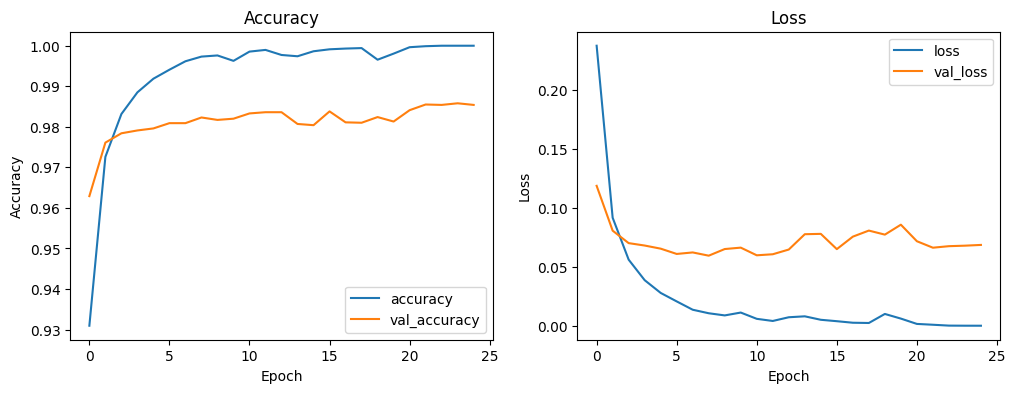

In [3]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


2 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8713 - loss: 0.4732 - val_accuracy: 0.9628 - val_loss: 0.1233
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9695 - loss: 0.1007 - val_accuracy: 0.9734 - val_loss: 0.0861
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9800 - loss: 0.0636 - val_accuracy: 0.9759 - val_loss: 0.0755
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9870 - loss: 0.0424 - val_accuracy: 0.9777 - val_loss: 0.0708
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9913 - loss: 0.0290 - val_accuracy: 0.9787 - val_loss: 0.0669
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9926 - loss: 0.0231 - val_accuracy: 0.9777 - val_loss: 0.0770
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9799 - val_loss: 0.0667
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9956 - loss: 0.0144 - val_accurac

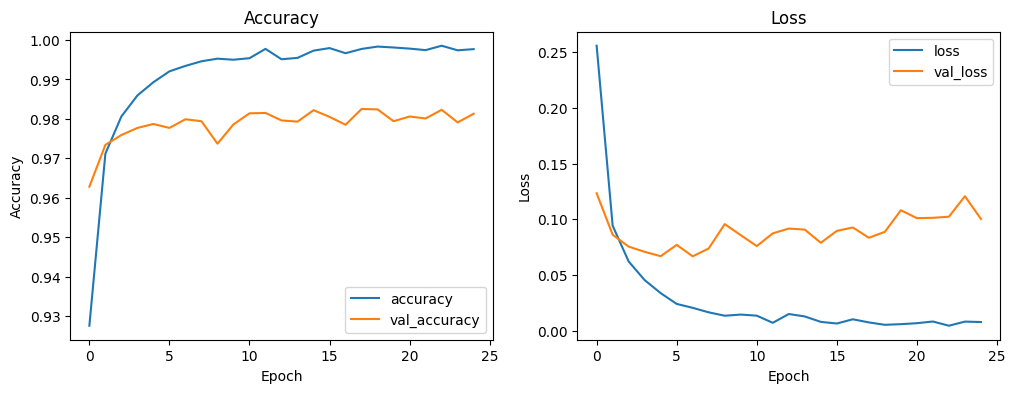

In [4]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8901 - loss: 0.3852 - val_accuracy: 0.9664 - val_loss: 0.1048
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9731 - loss: 0.0848 - val_accuracy: 0.9761 - val_loss: 0.0757
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9843 - loss: 0.0508 - val_accuracy: 0.9768 - val_loss: 0.0764
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9888 - loss: 0.0351 - val_accuracy: 0.9769 - val_loss: 0.0734
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9800 - val_loss: 0.0697
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9931 - loss: 0.0198 - val_accuracy: 0.9771 - val_loss: 0.0892
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9938 - loss: 0.0174 - val_accuracy: 0.9761 - val_loss: 0.0935
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9947 - loss: 0.0148 - val_

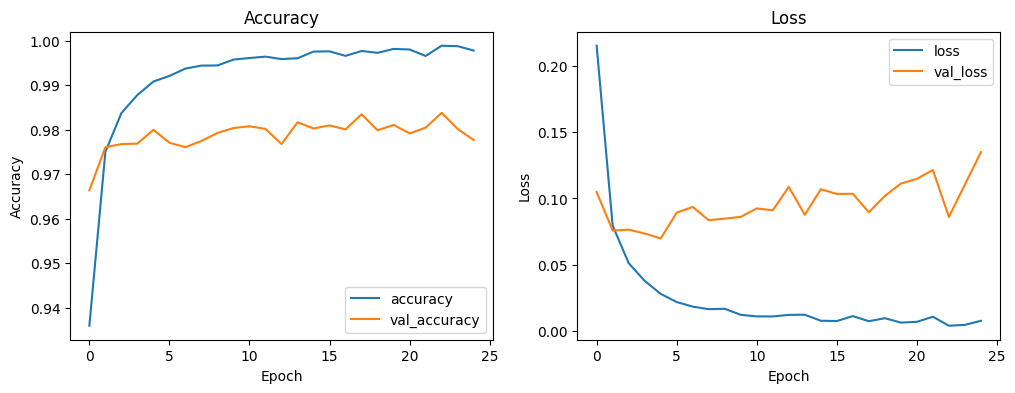

In [5]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.8938 - loss: 0.3478 - val_accuracy: 0.9685 - val_loss: 0.1033
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9766 - loss: 0.0708 - val_accuracy: 0.9766 - val_loss: 0.0728
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.9861 - loss: 0.0449 - val_accuracy: 0.9791 - val_loss: 0.0681
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.9886 - loss: 0.0340 - val_accuracy: 0.9773 - val_loss: 0.0798
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9909 - loss: 0.0267 - val_accuracy: 0.9802 - val_loss: 0.0709
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9947 - loss: 0.0159 - val_accuracy: 0.9785 - val_loss: 0.0799
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.9935 - loss: 0.0207 - val_accuracy: 0.9767 - val_loss: 0.0936
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9941 - loss: 0.0170 - 

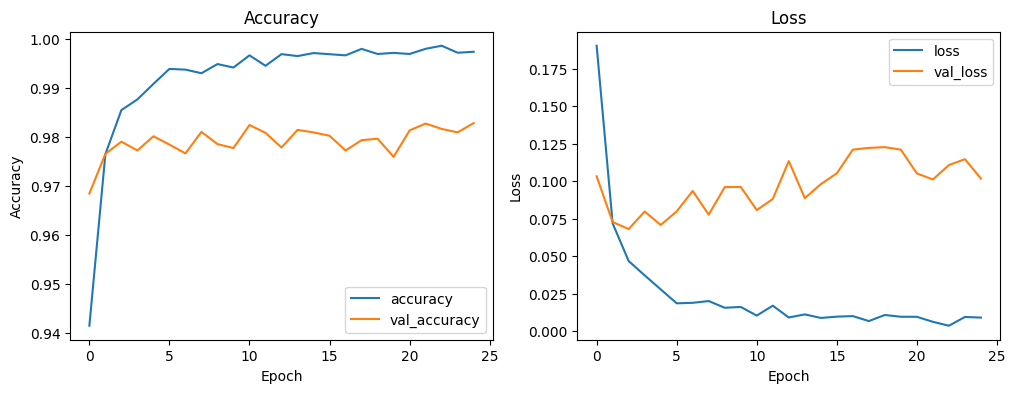

In [6]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()


3 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8538 - loss: 0.4888 - val_accuracy: 0.9660 - val_loss: 0.1119
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9706 - loss: 0.0952 - val_accuracy: 0.9743 - val_loss: 0.0859
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9818 - loss: 0.0583 - val_accuracy: 0.9735 - val_loss: 0.0864
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9859 - loss: 0.0439 - val_accuracy: 0.9778 - val_loss: 0.0769
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9899 - loss: 0.0324 - val_accuracy: 0.9777 - val_loss: 0.0848
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9918 - loss: 0.0253 - val_accuracy: 0.9774 - val_loss: 0.0786
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9939 - loss: 0.0190 - val_accuracy: 0.9752 - val_loss: 0.0968
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9917 - loss: 0.0238 - val_a

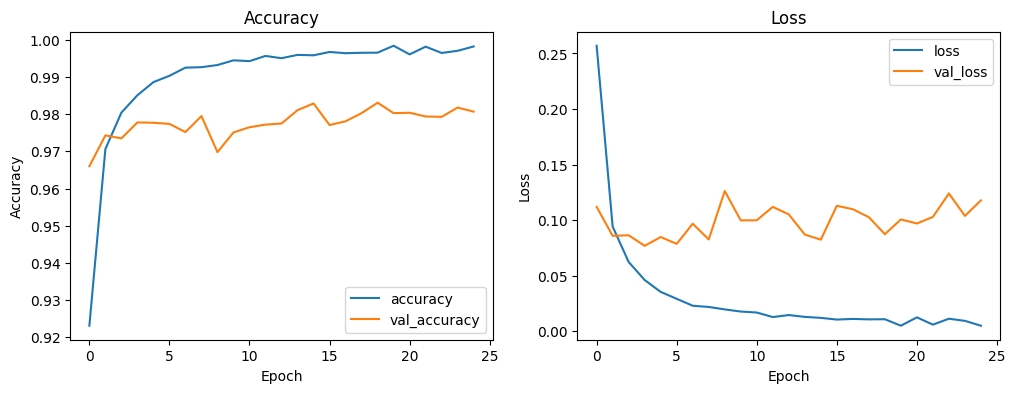

In [7]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.8764 - loss: 0.3933 - val_accuracy: 0.9661 - val_loss: 0.1124
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9735 - loss: 0.0835 - val_accuracy: 0.9772 - val_loss: 0.0694
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9841 - loss: 0.0504 - val_accuracy: 0.9767 - val_loss: 0.0789
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9864 - loss: 0.0394 - val_accuracy: 0.9799 - val_loss: 0.0713
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9904 - loss: 0.0292 - val_accuracy: 0.9799 - val_loss: 0.0709
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9915 - loss: 0.0258 - val_accuracy: 0.9772 - val_loss: 0.0817
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.9920 - loss: 0.0234 - val_accuracy: 0.9803 - val_loss: 0.0759
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9941 - loss: 0.0186 - 

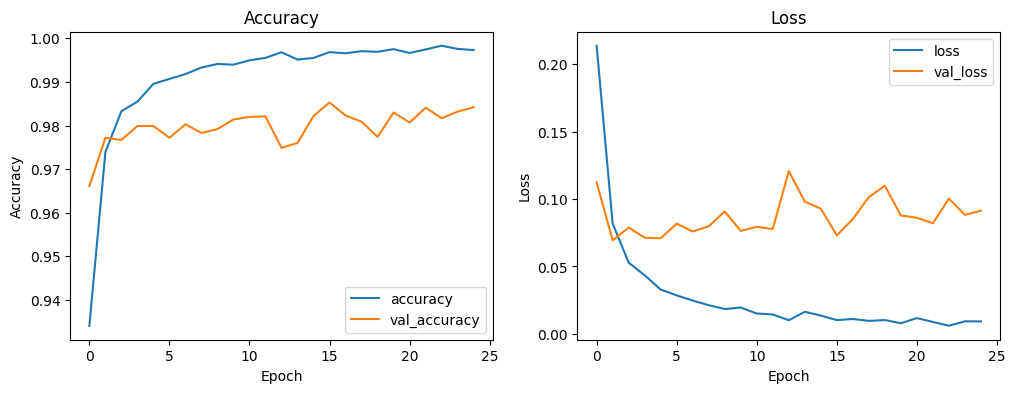

In [8]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.8875 - loss: 0.3499 - val_accuracy: 0.9675 - val_loss: 0.1028
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9733 - loss: 0.0881 - val_accuracy: 0.9727 - val_loss: 0.0897
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 87ms/step - accuracy: 0.9829 - loss: 0.0545 - val_accuracy: 0.9780 - val_loss: 0.0775
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9793 - val_loss: 0.0814
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9885 - loss: 0.0362 - val_accuracy: 0.9738 - val_loss: 0.0966
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.9909 - loss: 0.0296 - val_accuracy: 0.9781 - val_loss: 0.0834
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 0.9795 - val_loss: 0.0797
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.9918 - loss: 0.0241 - 

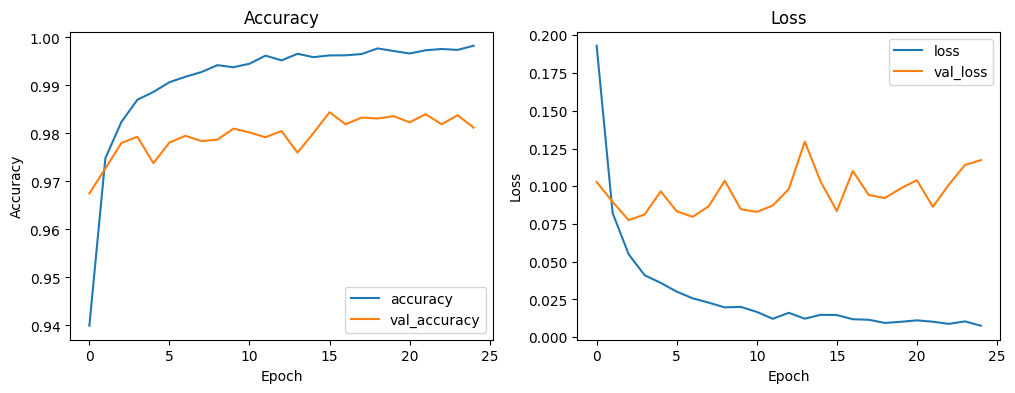

In [9]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

4 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8624 - loss: 0.4682 - val_accuracy: 0.9614 - val_loss: 0.1221
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9703 - loss: 0.0973 - val_accuracy: 0.9699 - val_loss: 0.0912
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9802 - loss: 0.0606 - val_accuracy: 0.9752 - val_loss: 0.0779
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9856 - loss: 0.0451 - val_accuracy: 0.9744 - val_loss: 0.0877
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9875 - loss: 0.0368 - val_accuracy: 0.9756 - val_loss: 0.0813
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9909 - loss: 0.0291 - val_accuracy: 0.9796 - val_loss: 0.0778
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9913 - loss: 0.0263 - val_accuracy: 0.9751 - val_loss: 0.0970
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9909 - loss: 0.0298 - val_ac

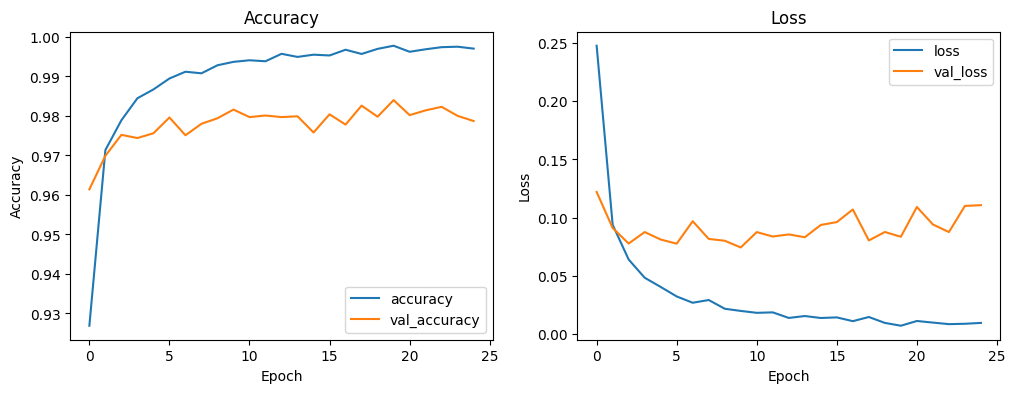

In [10]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 33ms/step - accuracy: 0.8803 - loss: 0.4008 - val_accuracy: 0.9632 - val_loss: 0.1210
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9715 - loss: 0.0953 - val_accuracy: 0.9714 - val_loss: 0.0941
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9801 - loss: 0.0629 - val_accuracy: 0.9798 - val_loss: 0.0626
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9867 - loss: 0.0430 - val_accuracy: 0.9806 - val_loss: 0.0640
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9899 - loss: 0.0331 - val_accuracy: 0.9747 - val_loss: 0.0883
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9891 - loss: 0.0329 - val_accuracy: 0.9764 - val_loss: 0.0868
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9924 - loss: 0.0245 - val_accuracy: 0.9795 - val_loss: 0.0762
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9940 - loss: 0.0187 - 

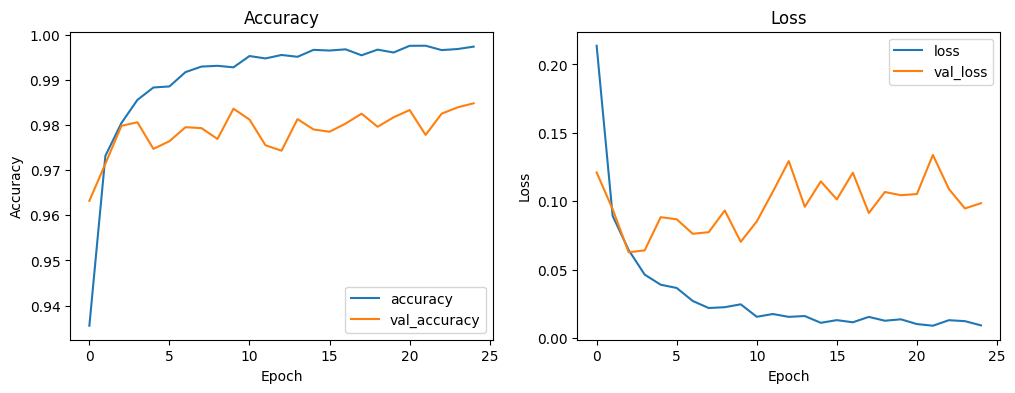

In [11]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 113ms/step - accuracy: 0.8822 - loss: 0.3701 - val_accuracy: 0.9637 - val_loss: 0.1174
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - accuracy: 0.9718 - loss: 0.0930 - val_accuracy: 0.9700 - val_loss: 0.1053
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 114ms/step - accuracy: 0.9817 - loss: 0.0620 - val_accuracy: 0.9691 - val_loss: 0.1100
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 53s 113ms/step - accuracy: 0.9836 - loss: 0.0544 - val_accuracy: 0.9783 - val_loss: 0.0756
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.9889 - loss: 0.0375 - val_accuracy: 0.9761 - val_loss: 0.0881
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 115ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9766 - val_loss: 0.1036
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.9917 - loss: 0.0284 - val_accuracy: 0.9790 - val_loss: 0.0927
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 113ms/step - accuracy: 0.9931 - loss: 0

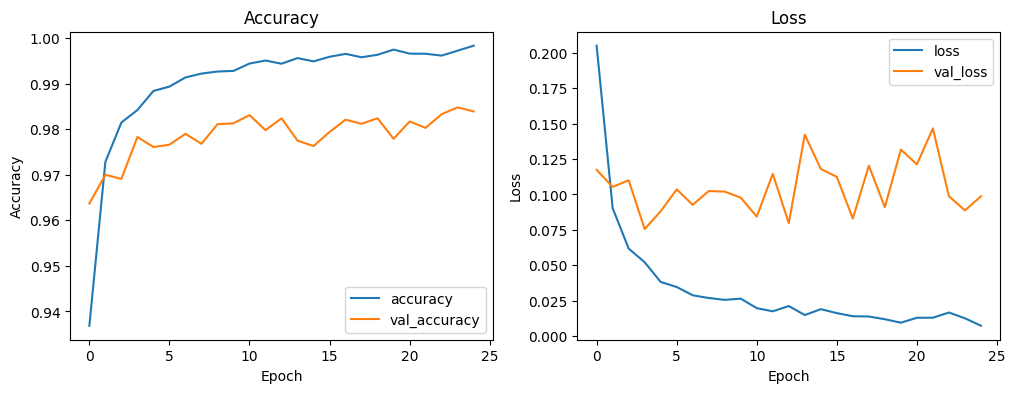

In [12]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

5 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8493 - loss: 0.4911 - val_accuracy: 0.9637 - val_loss: 0.1147
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9697 - loss: 0.0988 - val_accuracy: 0.9731 - val_loss: 0.0883
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9787 - loss: 0.0689 - val_accuracy: 0.9764 - val_loss: 0.0864
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9844 - loss: 0.0540 - val_accuracy: 0.9772 - val_loss: 0.0760
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9866 - loss: 0.0416 - val_accuracy: 0.9783 - val_loss: 0.0818
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9910 - loss: 0.0318 - val_accuracy: 0.9760 - val_loss: 0.0857
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9909 - loss: 0.0292 - val_accuracy: 0.9787 - val_loss: 0.0821
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9922 - loss: 0.0266 - val_a

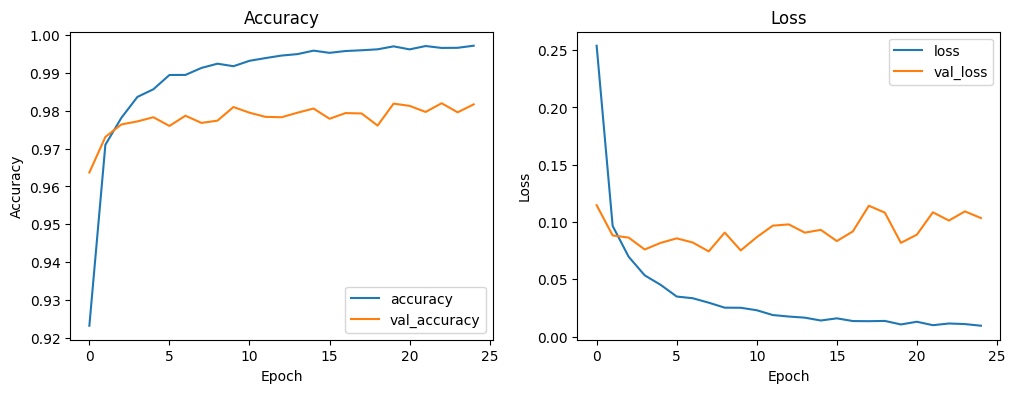

In [13]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.8689 - loss: 0.4176 - val_accuracy: 0.9622 - val_loss: 0.1229
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9711 - loss: 0.0970 - val_accuracy: 0.9708 - val_loss: 0.0953
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9802 - loss: 0.0655 - val_accuracy: 0.9760 - val_loss: 0.0826
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9855 - loss: 0.0461 - val_accuracy: 0.9732 - val_loss: 0.0997
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9873 - loss: 0.0431 - val_accuracy: 0.9808 - val_loss: 0.0706
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9902 - loss: 0.0319 - val_accuracy: 0.9804 - val_loss: 0.0764
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9907 - loss: 0.0301 - val_accuracy: 0.9811 - val_loss: 0.0823
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.9931 - loss: 0.0222 - 

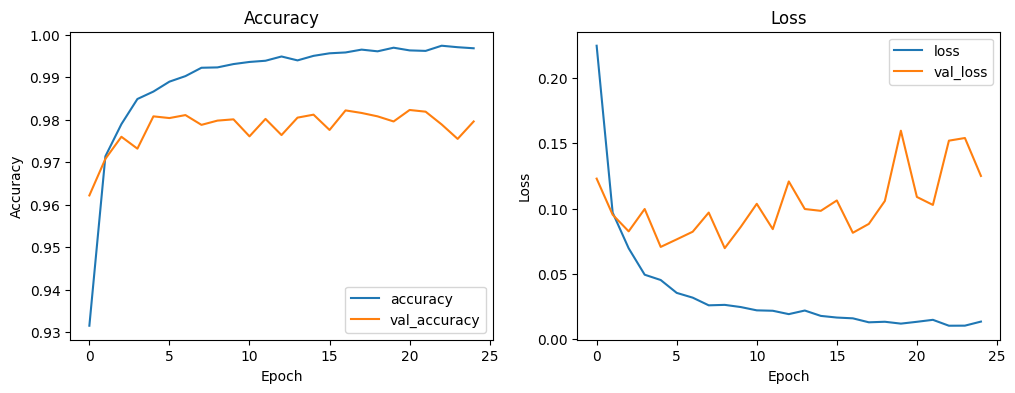

In [14]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 149ms/step - accuracy: 0.8751 - loss: 0.3970 - val_accuracy: 0.9686 - val_loss: 0.1127
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 148ms/step - accuracy: 0.9703 - loss: 0.1043 - val_accuracy: 0.9714 - val_loss: 0.1049
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 143ms/step - accuracy: 0.9791 - loss: 0.0735 - val_accuracy: 0.9720 - val_loss: 0.1070
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.9840 - loss: 0.0552 - val_accuracy: 0.9757 - val_loss: 0.0997
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 143ms/step - accuracy: 0.9866 - loss: 0.0471 - val_accuracy: 0.9771 - val_loss: 0.0910
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 140ms/step - accuracy: 0.9889 - loss: 0.0387 - val_accuracy: 0.9805 - val_loss: 0.0843
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 143ms/step - accuracy: 0.9918 - loss: 0.0269 - val_accuracy: 0.9803 - val_loss: 0.0921
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 140ms/step - accuracy: 0.9910 - loss: 0

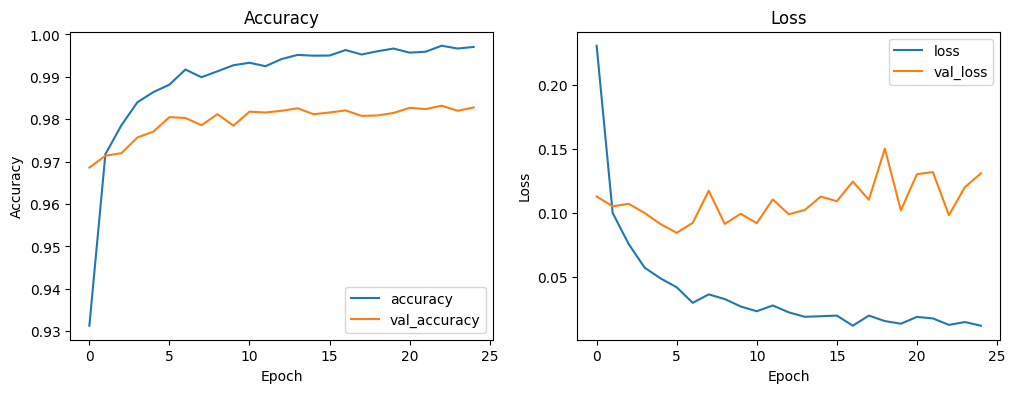

In [15]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

6 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8493 - loss: 0.4941 - val_accuracy: 0.9606 - val_loss: 0.1246
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9675 - loss: 0.1076 - val_accuracy: 0.9660 - val_loss: 0.1187
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9759 - loss: 0.0772 - val_accuracy: 0.9733 - val_loss: 0.0914
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9824 - loss: 0.0593 - val_accuracy: 0.9718 - val_loss: 0.0908
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9859 - loss: 0.0463 - val_accuracy: 0.9762 - val_loss: 0.0889
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9884 - loss: 0.0378 - val_accuracy: 0.9748 - val_loss: 0.0917
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9897 - loss: 0.0356 - val_accuracy: 0.9795 - val_loss: 0.0802
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9912 - loss: 0.0279 - val_ac

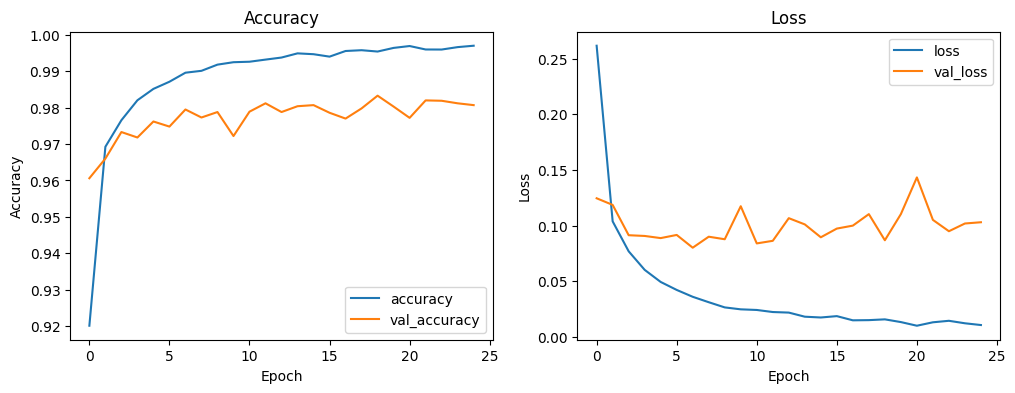

In [16]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - accuracy: 0.8603 - loss: 0.4363 - val_accuracy: 0.9667 - val_loss: 0.1153
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9711 - loss: 0.1057 - val_accuracy: 0.9665 - val_loss: 0.1253
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9784 - loss: 0.0760 - val_accuracy: 0.9738 - val_loss: 0.0950
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.9830 - loss: 0.0590 - val_accuracy: 0.9747 - val_loss: 0.0955
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9859 - loss: 0.0486 - val_accuracy: 0.9799 - val_loss: 0.0848
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9899 - loss: 0.0344 - val_accuracy: 0.9763 - val_loss: 0.0972
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.9892 - loss: 0.0358 - val_accuracy: 0.9713 - val_loss: 0.1325
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9898 - loss: 0.0351 - 

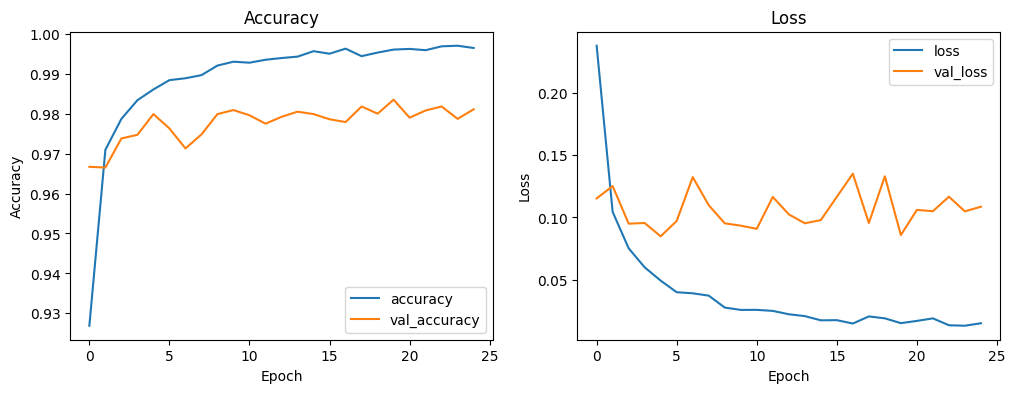

In [17]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 176ms/step - accuracy: 0.8540 - loss: 0.4654 - val_accuracy: 0.9542 - val_loss: 0.1530
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.9694 - loss: 0.1116 - val_accuracy: 0.9719 - val_loss: 0.0987
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 170ms/step - accuracy: 0.9781 - loss: 0.0790 - val_accuracy: 0.9704 - val_loss: 0.1128
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 173ms/step - accuracy: 0.9821 - loss: 0.0628 - val_accuracy: 0.9750 - val_loss: 0.0914
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 175ms/step - accuracy: 0.9861 - loss: 0.0532 - val_accuracy: 0.9710 - val_loss: 0.1119
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 170ms/step - accuracy: 0.9867 - loss: 0.0461 - val_accuracy: 0.9800 - val_loss: 0.1049
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 174ms/step - accuracy: 0.9893 - loss: 0.0442 - val_accuracy: 0.9726 - val_loss: 0.1240
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 173ms/step - accuracy: 0.9897 - loss: 

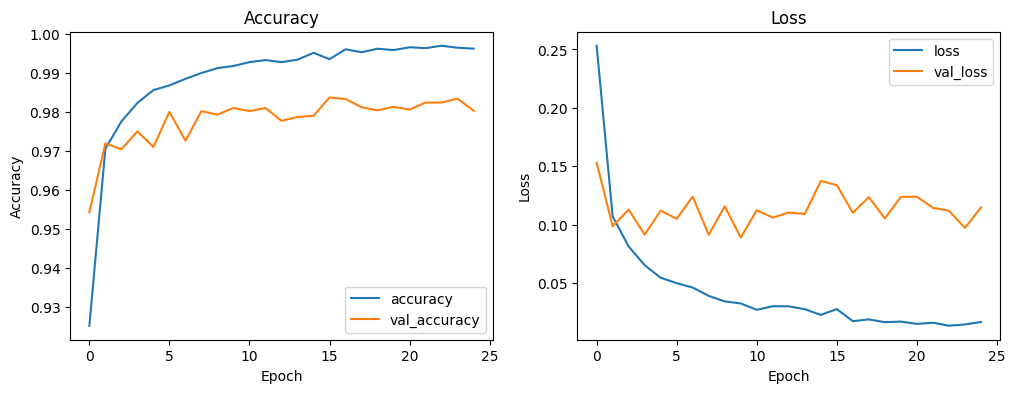

In [18]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

7 256 512 1024

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8329 - loss: 0.5267 - val_accuracy: 0.9608 - val_loss: 0.1267
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9647 - loss: 0.1166 - val_accuracy: 0.9732 - val_loss: 0.0881
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9777 - loss: 0.0750 - val_accuracy: 0.9726 - val_loss: 0.0881
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9826 - loss: 0.0580 - val_accuracy: 0.9763 - val_loss: 0.0847
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9856 - loss: 0.0486 - val_accuracy: 0.9753 - val_loss: 0.0959
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9872 - loss: 0.0414 - val_accuracy: 0.9715 - val_loss: 0.1109
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9881 - loss: 0.0405 - val_accuracy: 0.9783 - val_loss: 0.0846
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9896 - loss: 0.0348 - val_

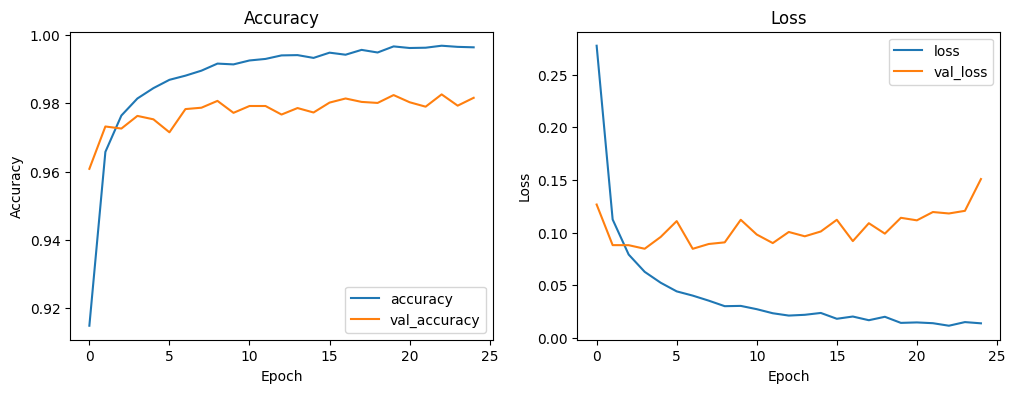

In [19]:
#256
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(256, activation='relu', input_shape=(256)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 55ms/step - accuracy: 0.8486 - loss: 0.4686 - val_accuracy: 0.9586 - val_loss: 0.1415
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - accuracy: 0.9702 - loss: 0.1097 - val_accuracy: 0.9657 - val_loss: 0.1161
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.9770 - loss: 0.0784 - val_accuracy: 0.9706 - val_loss: 0.1166
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9817 - loss: 0.0656 - val_accuracy: 0.9746 - val_loss: 0.0910
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9849 - loss: 0.0544 - val_accuracy: 0.9768 - val_loss: 0.1049
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9872 - loss: 0.0460 - val_accuracy: 0.9785 - val_loss: 0.1021
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.9891 - loss: 0.0415 - val_accuracy: 0.9743 - val_loss: 0.1106
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9902 - loss: 0.0362 - 

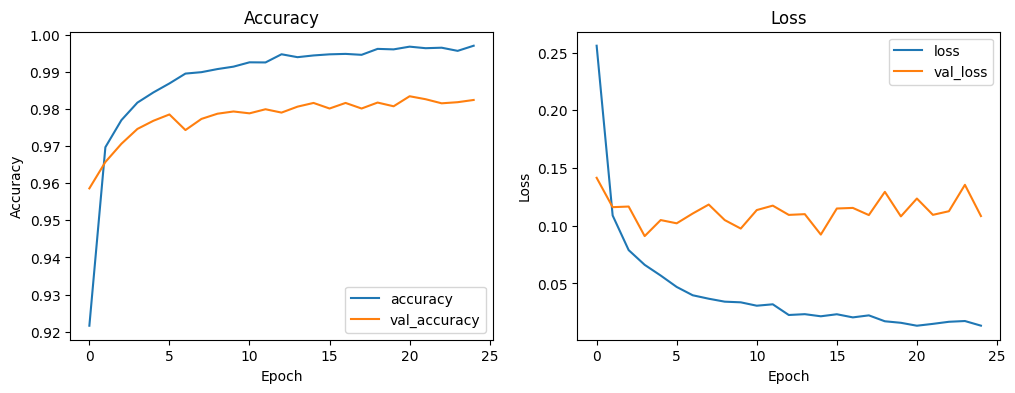

In [20]:
#512
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(512, activation='relu', input_shape=(512)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 200ms/step - accuracy: 0.8475 - loss: 0.4787 - val_accuracy: 0.9588 - val_loss: 0.1448
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 203ms/step - accuracy: 0.9671 - loss: 0.1287 - val_accuracy: 0.9554 - val_loss: 0.1786
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 197ms/step - accuracy: 0.9751 - loss: 0.0915 - val_accuracy: 0.9756 - val_loss: 0.0975
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 91s 194ms/step - accuracy: 0.9816 - loss: 0.0678 - val_accuracy: 0.9684 - val_loss: 0.1365
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 196ms/step - accuracy: 0.9838 - loss: 0.0613 - val_accuracy: 0.9741 - val_loss: 0.1342
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 198ms/step - accuracy: 0.9851 - loss: 0.0600 - val_accuracy: 0.9693 - val_loss: 0.1259
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 92s 197ms/step - accuracy: 0.9872 - loss: 0.0523 - val_accuracy: 0.9797 - val_loss: 0.0933
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 199ms/step - accuracy: 0.9896 - los

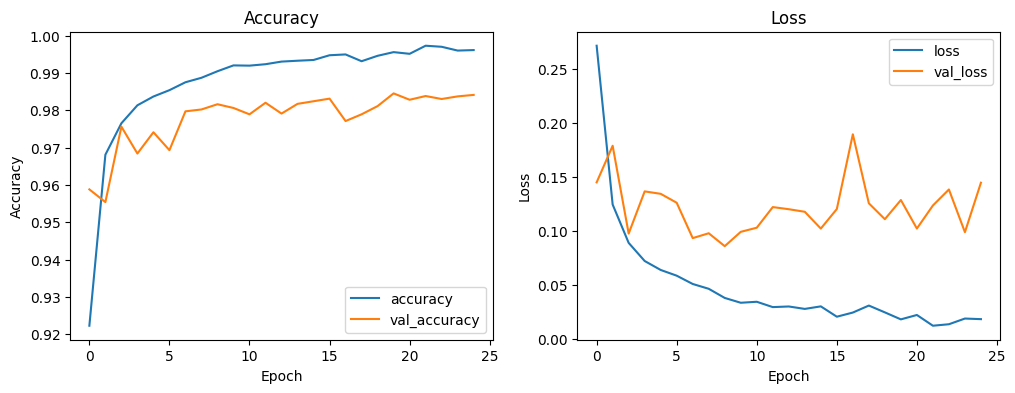

In [21]:
#1024
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# 載入數據
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 預處理數據
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot 編碼
train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

# 建立簡單的神經網絡模型
network = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(1024, activation='relu', input_shape=(1024)),
    layers.Dense(10, activation='softmax')
])

# 編譯模型 adam rmsprop
network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
start_time = time.time()
# 訓練模型
history = network.fit(train_images, train_labels_onehot, epochs=25, batch_size=128, validation_data=(test_images, test_labels_onehot))
end_time = time.time()
print(f"Training time: {end_time - start_time} seconds")


# 評估模型
test_loss, test_acc = network.evaluate(test_images, test_labels_onehot)
print('Test Accuracy:', test_acc)

# **計算 Precision、Recall、F1-score**
# 取得預測結果
y_pred_probs = network.predict(test_images)  # 取得 softmax 機率分佈
y_pred = y_pred_probs.argmax(axis=1)  # 轉換為類別索引
y_true = test_labels  # 原始標籤（非 One-hot）

# 計算 Precision, Recall, F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# **繪製訓練過程的 Accuracy 與 Loss**
plt.figure(figsize=(12, 4))

# 繪製準確率曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

# 繪製損失曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')

plt.show()